<a href="https://colab.research.google.com/github/mitsugui/alura-imersao-python/blob/main/Imers%C3%A3o_Python_Alura_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.relativedelta
from prophet import Prophet

In [ ]:
# Baixar dados dos últimos 4 anos para uma ação específica
df_dados = yf.download("XPML11.SA", start="2020-01-01", end="2024-12-31", progress=False)
df_dados = df_dados.reset_index()
df_dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-04,103.945732,104.340401,102.968925,103.481995,85.543327,44100
1,2020-06-05,103.649727,105.771072,103.501732,105.672401,87.354019,58858
2,2020-06-08,105.603340,108.533752,105.573738,108.237747,89.474670,68129
3,2020-06-09,108.237747,108.533752,105.672401,107.754280,89.074989,52194
4,2020-06-10,107.744415,109.313217,105.692139,108.888947,90.012962,69778
...,...,...,...,...,...,...,...
944,2024-03-22,116.342049,116.572029,115.952072,115.992065,115.992065,100585
945,2024-03-25,116.089996,116.400002,116.040001,116.169998,116.169998,83600
946,2024-03-26,116.169998,116.279999,116.010002,116.099998,116.099998,75847
947,2024-03-27,116.110001,116.290001,115.849998,115.900002,115.900002,188938


In [ ]:
# Divide os dados em treino (até final de fevereiro de 2024) e teste (á partir de março)
ultimo_mes = datetime.now() - dateutil.relativedelta.relativedelta(months=1)
dados_treino = df_dados[df_dados["Date"] < ultimo_mes]
dados_teste = df_dados[df_dados["Date"] >= ultimo_mes]

In [ ]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[["Date", "Close"]].rename(columns={ "Date":"ds", "Close":"y" })

In [ ]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name="BR")

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcog3g0bc/1spuctr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcog3g0bc/qwprcgqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91699', 'data', 'file=/tmp/tmpcog3g0bc/1spuctr8.json', 'init=/tmp/tmpcog3g0bc/qwprcgqf.json', 'output', 'file=/tmp/tmpcog3g0bc/prophet_modeleo1627ep/prophet_model-20240330043900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:39:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o março de 2024
futuro = modelo.make_future_dataframe(periods=40)
previsao = modelo.predict(futuro)

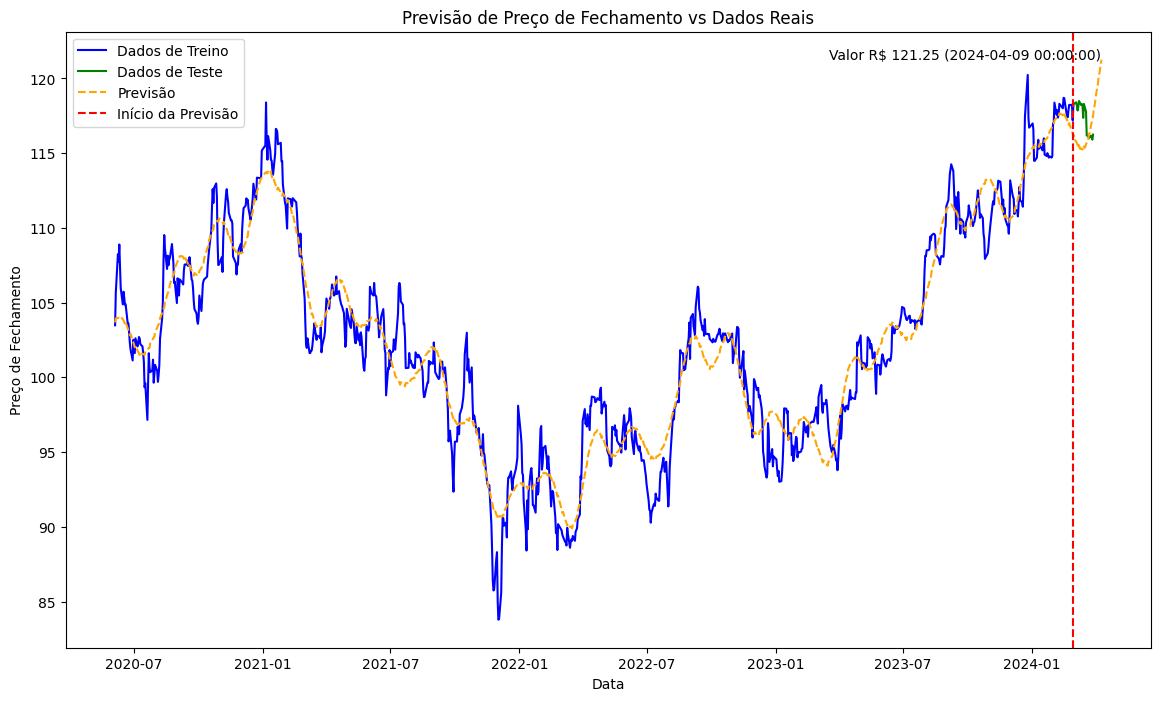

In [ ]:
# Plotar os dados de treino, teste e previsão
plt.figure(figsize=(14, 8))
plt.plot(dados_treino["Date"], dados_treino["Close"], label="Dados de Treino", color="blue")
plt.plot(dados_teste["Date"], dados_teste["Close"], label="Dados de Teste", color="green")
plt.plot(previsao["ds"], previsao["yhat"], label="Previsão", color="orange", linestyle="--")

x = previsao["ds"].iloc[-1];
y = previsao["yhat"].iloc[-1];
plt.text(x, y, f"Valor R$ {y:,.2f} ({x})",horizontalalignment='right')

plt.axvline(dados_treino["Date"].max(), color="red", linestyle="--", label="Início da Previsão")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.title("Previsão de Preço de Fechamento vs Dados Reais")
plt.legend()
plt.show()